# Part 4: Displaying Results

The last Part of the code focuses on creating functions that can be used to display the results obtained in our analysis. Let's first load all the data required.

In [5]:
import geopandas as gpd

AOI_path = 'Data_files/Area_of_interest.shp'
AOI = gpd.read_file(AOI_path)

join_path = "Data_files/Output_files/ZonalStatsNDVI_habitatconnectivity.geojson"
join = gpd.read_file(join_path)

ndvi_path = 'Data_files/Output_files/clipped_ndvi.tif'

hab_con_path="Data_files/Output_files/hab_con_epsg2633.asc"

## Plotting Statistics
This section will use `matplotlib` and `seaborn` libraries to display the distribution of NDVI and habitat connectivity relative to management type. 

### Histograms
The code below defines a function to plot histograms for multiple columns, grouped by a single column.

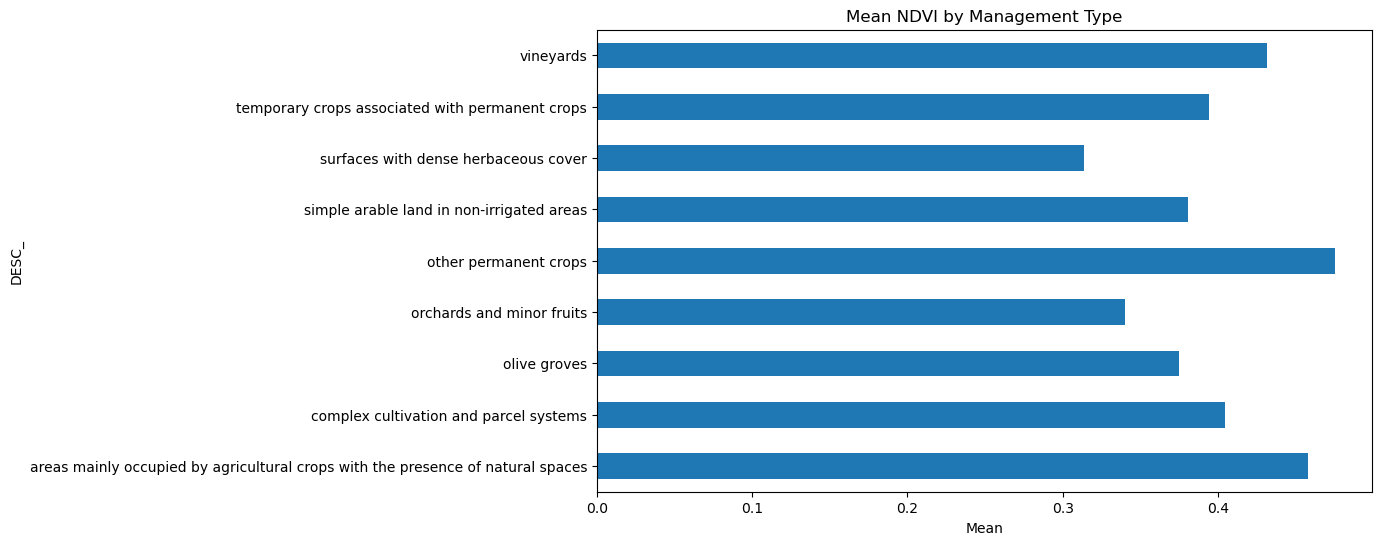

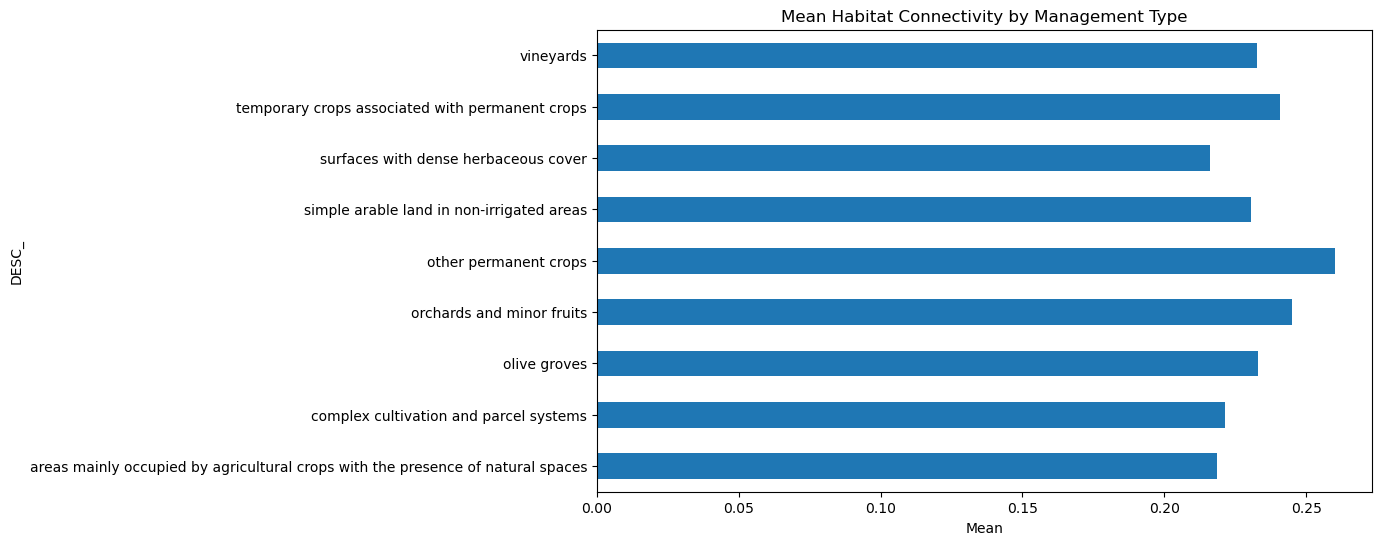

In [18]:
import matplotlib.pyplot as plt

def plot_mean_values(data, group_column, value_columns, titles):
    """
    Function to plot mean values for multiple columns, grouped by a single column.

    Parameters:
    data (GeoDataFrame): The GeoDataFrame containing the data.
    group_column (str): The name of the column to group by.
    value_columns (list of str): A list of column names to calculate mean values for.
    titles (list of str): A list of titles for the plots.
    """

    for value_column, title in zip(value_columns, titles):
        # Group by 'group_column' and calculate the mean
        mean_values = data.groupby(group_column)[value_column].mean()

        # Create a horizontal bar chart
        mean_values.plot(kind='barh', figsize=(10, 6))
        plt.xlabel('Mean')
        plt.ylabel(group_column)
        plt.title(title)
        plt.show()

plot_mean_values(join, 'DESC_', ['mean_ndvi', 'mean_hab'], ['Mean NDVI by Management Type', 'Mean Habitat Connectivity by Management Type'])

### Violin Plots

Similarly, we can create a function to plot **violin plots** for multiple x columns against a single y column. Violin plots are a visual representation that combines a box plot and a kernel density plot. They can be used to display the distribution of continuous variables, e.g. NDVI and Habitat Connectivity, across different categories, like our Management Types. The width of the shaded area in the plot, or the “violin,” represents the density or frequency of data at different NDVI values. Inside each “violin” is a box plot, with the white dot representing the median of the data, and the thick black bar representing the interquartile range. This plot allows for a comparison of the distribution of NDVI and Habitat Connectivity values across different management types, providing insights into which management types have higher median NDVI values, which have a larger spread of NDVI values, and so on.

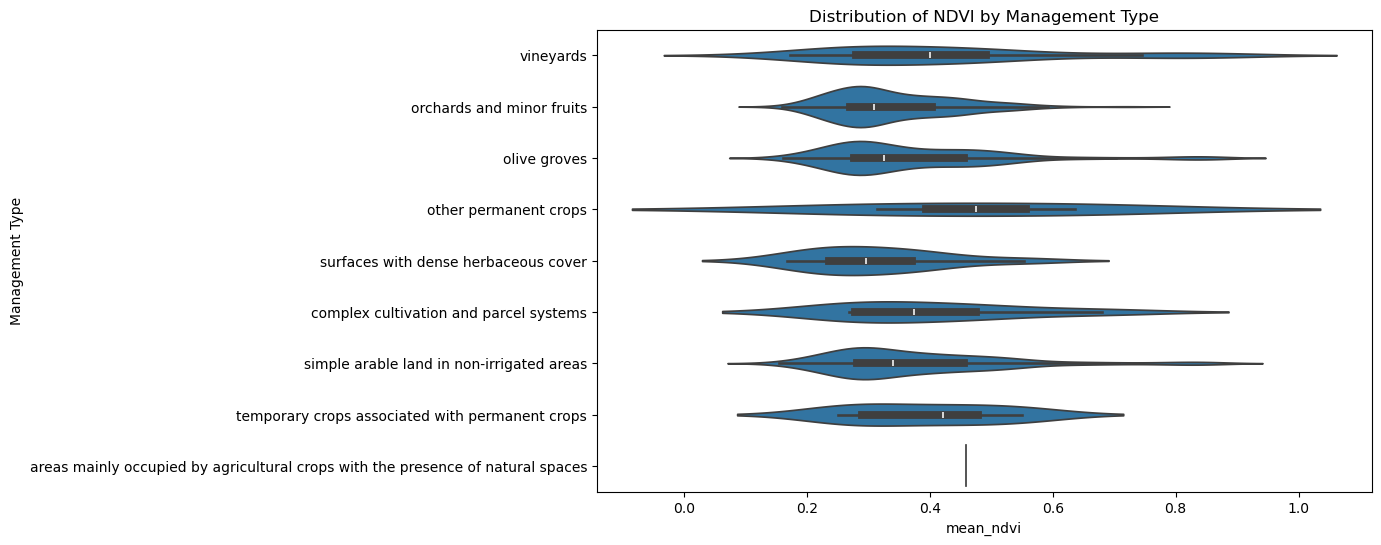

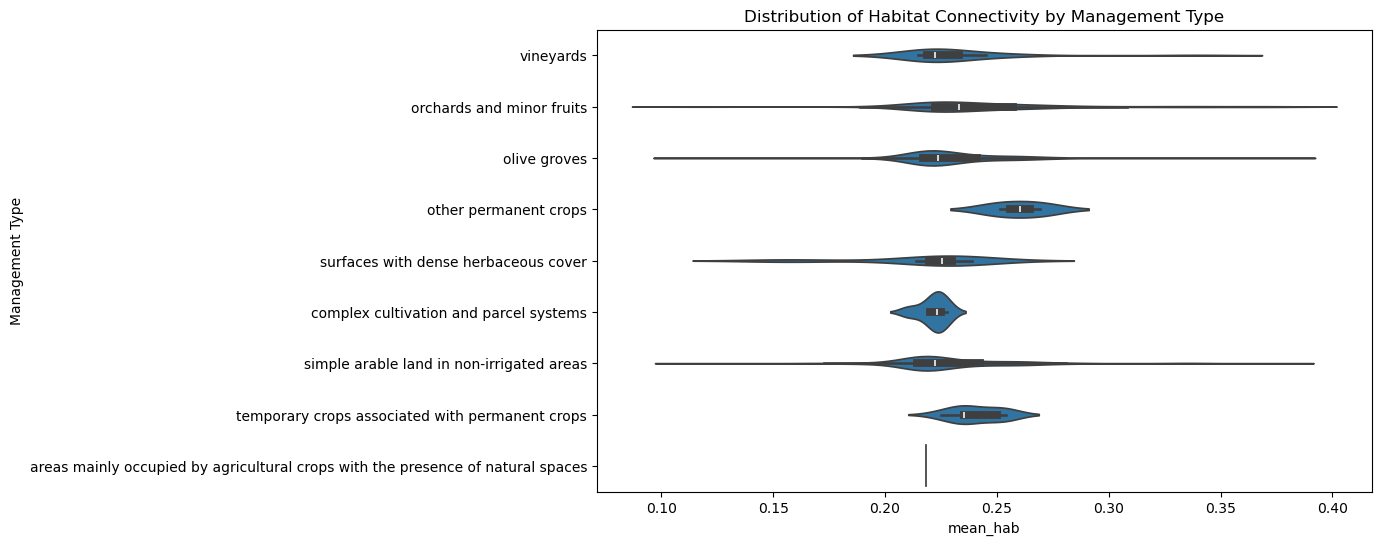

In [16]:
import seaborn as sns

def plot_horizontal_violinplots(data, y_column, x_columns, titles):
    """
    Function to plot horizontal violin plots for multiple x columns against a single y column.

    Parameters:
    data (GeoDataFrame): The GeoDataFrame containing the data.
    y_column (str): The name of the column to use for the y-axis.
    x_columns (list of str): A list of column names to use for the x-axis.
    titles (list of str): A list of titles for the plots.
    """

    for x_column, title in zip(x_columns, titles):
        plt.figure(figsize=(10, 6))
        sns.violinplot(y=y_column, x=x_column, data=data, orient='h')
        plt.title(title)
        plt.xlabel(x_column)
        plt.ylabel('Management Type')
        plt.show()

plot_horizontal_violinplots(join, 'DESC_', ['mean_ndvi', 'mean_hab'], ['Distribution of NDVI by Management Type', 'Distribution of Habitat Connectivity by Management Type'])

##  Visualising Geospatial Data

In addition to generating statistical graphs, another effective method to interpret our findings is by constructing geographical maps of our AOI. The python library `folium` is particularly useful for this purpose as it enables the creation of dynamic, interactive maps. The latter offer a rich set of features such as the ability to zoom in for a closer look at specific areas, and the use of popups to display more detailed information when certain parts of the map are clicked. This provides an intuitive way to explore and understand the data, as users can interact with the visual representation directly.

In [23]:
m=join.explore('DESC_', cmap='Blues')
m

In [4]:
import pyproj

# Define the UTM zone (e.g., UTM Zone 33N for Europe)
utm_zone = 33

# Create a UTM to latitude-longitude (WGS84) transformer
utm_to_wgs84 = pyproj.Transformer.from_crs(f'EPSG:326{utm_zone}', 'EPSG:4326', always_xy=True)

# Your provided UTM coordinates
utm_x, utm_y = center_lon, center_lat

# Convert to latitude and longitude
lon, lat = utm_to_wgs84.transform(utm_x, utm_y)

print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: 40.89995038970218, Longitude: 16.52793000194325



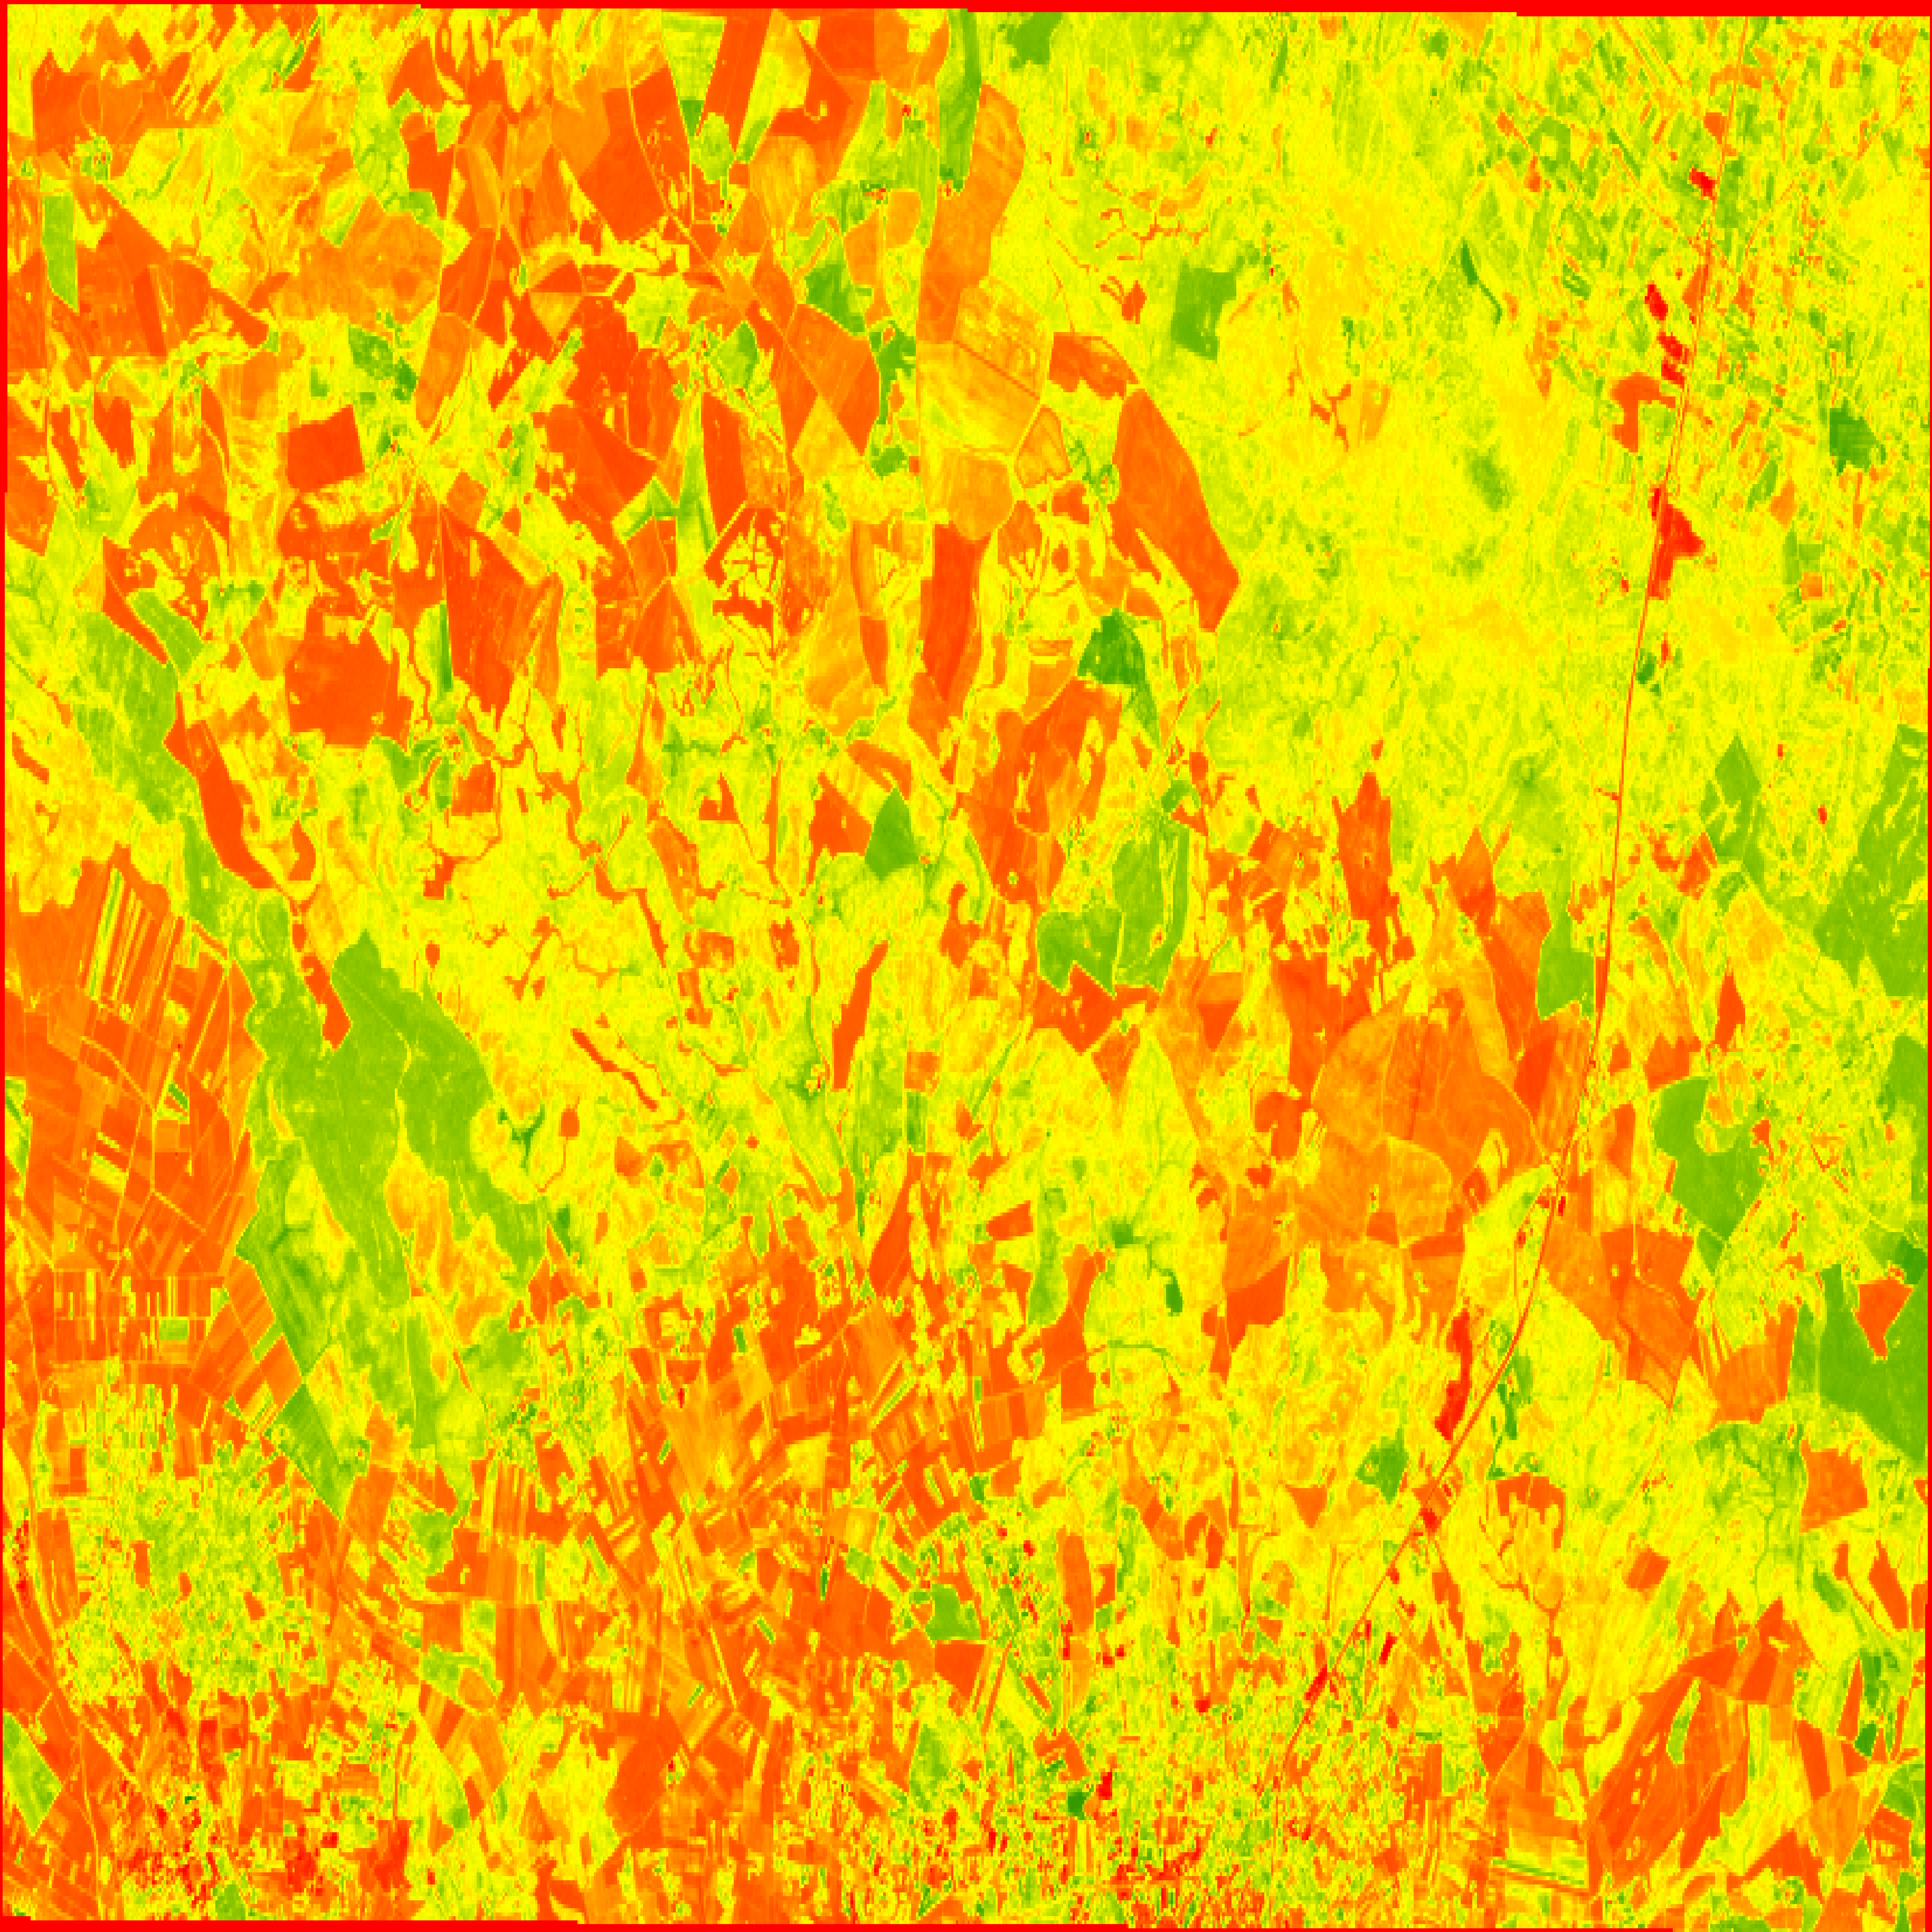

In [7]:
# Create a Folium map centered at a specific location (e.g., latitude, longitude)
m = folium.Map(location=[lat, lon], zoom_start=11, crs=ndvi_crs)

# Create a colormap for NDVI values
colormap = folium.LinearColormap(colors=["red", "yellow", "green"], vmin=0, vmax=1)

# Add the NDVI layer to the map
folium.raster_layers.ImageOverlay(
    image=ndvi_array,
    bounds=[[src.bounds.bottom, src.bounds.left], [src.bounds.top, src.bounds.right]],
    colormap=colormap,
).add_to(m)

m

In [ ]:
# Load the shapefile data using geopandas
shapefile_path = "shapefile.shp"
gdf = gpd.read_file(shapefile_path)

# Add the shapefile data as a GeoJSON overlay to the map
folium.GeoJson(gdf, name="Shapefile Overlay").add_to(m)

# Add a layer control to toggle the NDVI and shapefile layers
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save("ndvi_map.html")

print("NDVI map with shapefile overlay saved as ndvi_map.html")


In [ ]:
# Save the map to an HTML file
folium_map.save('Data_files/ndvi_with_shapefile_map.html')

In [ ]:
join.explore('DESC_', popup=True, legend=False, cmap='viridis')

In [ ]:
# Calculate the centroid of the area of interest
centroid = join.geometry.centroid
center_lat, center_lon = centroid.y.iloc[0], centroid.x.iloc[0]

import pyproj

# Define the UTM zone (e.g., UTM Zone 33N for Europe)
utm_zone = 33

# Create a UTM to latitude-longitude (WGS84) transformer
utm_to_wgs84 = pyproj.Transformer.from_crs(f'EPSG:326{utm_zone}', 'EPSG:4326', always_xy=True)

# Your provided UTM coordinates
utm_x, utm_y = center_lon, center_lat

# Convert to latitude and longitude
lon, lat = utm_to_wgs84.transform(utm_x, utm_y)

print(f"Latitude: {lat}, Longitude: {lon}")